<h1>Bike Sharing Demand</h1>

<h2>Forecast use of a city bikeshare system</h2>
<p/>
You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must <b>predict the <u>total count of bikes rented</u> during each hour</b> covered by the test set, using only information available prior to the rental period.
<p/>
<b>Data Fields</b>
<br/>
datetime - hourly date + timestamp<br/>
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br/>
holiday - whether the day is considered a holiday<br/>
workingday - whether the day is neither a weekend nor holiday<br/>
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br/>
temp - temperature in Celsius<br/>
atemp - "feels like" temperature in Celsius<br/>
humidity - relative humidity<br/>
windspeed - wind speed<br/>
casual - number of non-registered user rentals initiated<br/>
registered - number of registered user rentals initiated<br/>
count - number of total rentals<br/>

In [55]:
# all imports 
# pandas and numpy for loading data into dataframs from files and other numerical functions
# matplotlib, seaborn for visualization

import pandas as pd
import numpy as np

# import, instantiate, fit
from sklearn.linear_model import LinearRegression

#import train test split from sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

% matplotlib inline

# Loading Data in Python Dataframes

In [56]:
#read files stored @ D:\DataScience\ProjectData\ML_Project_1_BikeSharedata
#Data files different based on year, read all of available data files into different dataframes

file_loc = "D:/DataScience/ProjectData/ML_Project_1_BikeSharedata/"
file_name = "bikeshare.csv"

bikes = pd.read_csv(file_loc+file_name, sep=',', index_col='datetime', parse_dates=True)

In [57]:
# summary of the data (mean, STD, Min, Max)
bikes.describe()

# how data is distributed 
#bikes.info()

#bikes.columns

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [58]:
#top 5 rows from dataset
bikes.head()

#bottom 5 rows from dataset
#bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [59]:
# "count" is a method, so it's best to name that column something else
bikes.rename(columns={'count':'totalRentals'}, inplace=True)

<h2> Visualizing the data "Temparature V/S Rentals"</h2>

In [60]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

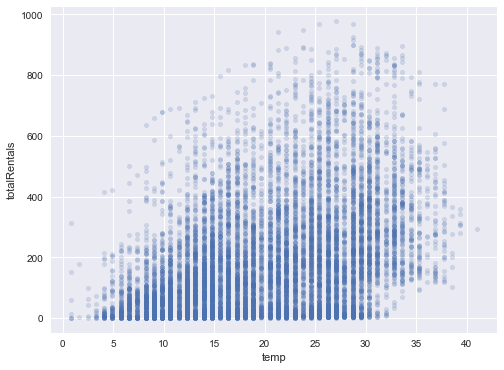

In [61]:
# Pandas scatter plot
bikes.plot(kind='scatter', x='temp', y='totalRentals', alpha=0.2)

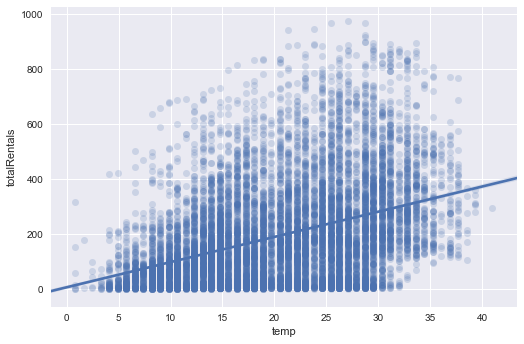

In [62]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp', y='totalRentals', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

<h2> Building Linear Regression Model </h2>

In [63]:
# create X and y
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.totalRentals

In [64]:
linreg = LinearRegression()
linreg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

6.04621295962
[ 9.17054048]


<h2>Using the model for prediction</h2>

How many bike rentals would we predict if the temperature was <b>25 degrees Celsius</b>?


In [66]:
# manually calculate the prediction
linreg.intercept_ + linreg.coef_*25

array([ 235.309725])

In [67]:
# use the predict method
linreg.predict(25)

array([ 235.309725])

<h2> Visualization data with more columns "Temparature, Season, Weather, Humidity V/S Rentals"</h2>

In [68]:
# explore more features
feature_cols = ['temp', 'season', 'weather', 'humidity']

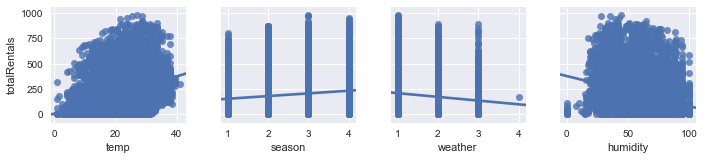

In [69]:
# multiple scatter plots in Seaborn
sns.pairplot(bikes, x_vars=feature_cols, y_vars='totalRentals', kind='reg')

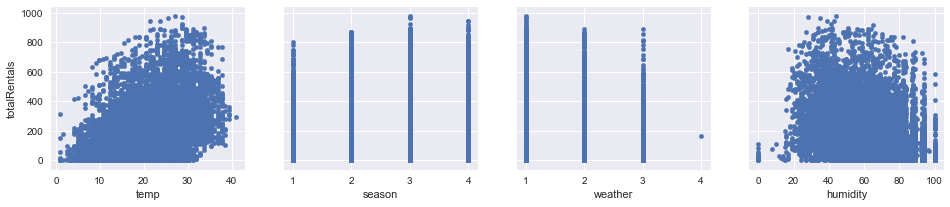

In [70]:
# multiple scatter plots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    bikes.plot(kind='scatter', x=feature, y='totalRentals', ax=axs[index], figsize=(16, 3))

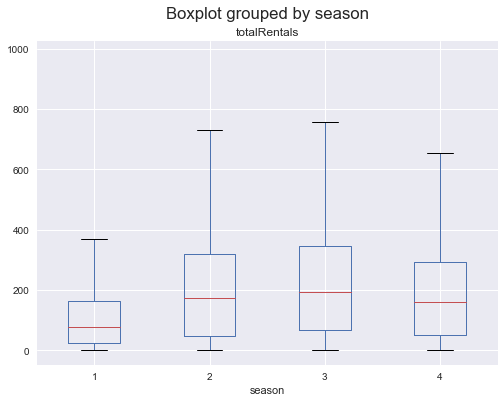

In [71]:
# box plot of rentals, grouped by season
bikes.boxplot(column='totalRentals', by='season')

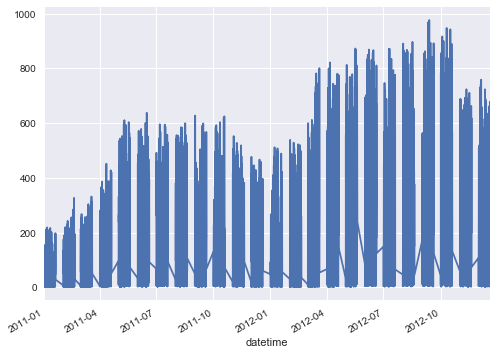

In [72]:
# line plot of rentals
bikes.totalRentals.plot()

<h2> Adding more features to the model </h2>

In [73]:
# create a list of features
feature_cols = ['temp', 'season', 'weather', 'humidity']

In [74]:
# create X and y
X = bikes[feature_cols]
y = bikes.totalRentals

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

159.520687861
[  7.86482499  22.53875753   6.67030204  -3.11887338]


In [75]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('temp', 7.8648249924774394),
 ('season', 22.538757532466761),
 ('weather', 6.6703020359237186),
 ('humidity', -3.1188733823965009)]

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **temperature** is associated with a **rental increase of 7.86 bikes**.
- Holding all other features fixed, a 1 unit increase in **season** is associated with a **rental increase of 22.5 bikes**.
- Holding all other features fixed, a 1 unit increase in **weather** is associated with a **rental increase of 6.67 bikes**.
- Holding all other features fixed, a 1 unit increase in **humidity** is associated with a **rental decrease of 3.12 bikes**.

In [76]:
# define a function that accepts a list of features and returns testing RMSE
# feature_cols = ['temp', 'season', 'weather', 'humidity'] already defined previously

def train_test_rmse(feature_cols):
    X = bikes[feature_cols]
    y = bikes.totalRentals
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [77]:
# compare different sets of features to find which set predicts more accurately

print (train_test_rmse(['temp', 'season', 'weather', 'humidity']))
print (train_test_rmse(['temp', 'season', 'weather']))
print (train_test_rmse(['temp', 'season', 'humidity']))
print (train_test_rmse(['temp', 'weather', 'humidity']))
print (train_test_rmse(['temp', 'season', 'humidity', 'windspeed']))

155.649459131
164.165399763
155.598189367
157.250295181
155.480060397


<h2>Handling categorical features </h2>
Converting categorical features into dummy

<ul>
<li><b>Ordered categories</b>: weather (already encoded with sensible numeric values)</li>
<li><b>Unordered categories</b>: season (needs dummy encoding) </li> 
<li><b>Holiday</b> (already dummy encoded) </li>
<li><b>Workingday</b> (already dummy encoded)    </li>
</ul>    

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an <b>ordered relationship</b>. Instead, we create multiple <b>dummy variables.</b>

In [78]:
# create dummy variables
season_dummies = pd.get_dummies(bikes.season, prefix='season')

# print 5 random rows
season_dummies.sample(n=5, random_state=1)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,0,0,1,0
2012-03-18 04:00:00,1,0,0,0
2012-10-14 17:00:00,0,0,0,1
2011-04-04 15:00:00,0,1,0,0
2012-12-11 02:00:00,0,0,0,1


In [79]:
# drop the first column, because three dummies captures all of the "information" about the season feature, 
# and implicitly defines spring (season 1) as the baseline level

season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

# print 5 random rows
season_dummies.sample(n=5, random_state=1)

,season_2,season_3,season_4
datetime,,,
2011-09-05 11:00:00,0,1,0
2012-03-18 04:00:00,0,0,0
2012-10-14 17:00:00,0,0,1
2011-04-04 15:00:00,1,0,0
2012-12-11 02:00:00,0,0,1


In [80]:
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
bikes = pd.concat([bikes, season_dummies], axis=1)

# print 5 random rows
bikes.sample(n=5, random_state=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,totalRentals,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,0,1,0
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,0,0,0
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,0,0,1
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,1,0,0
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,0,0,1


In [81]:
# include dummy variables for season in the model
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikes[feature_cols]
y = bikes.totalRentals
linreg = LinearRegression()
linreg.fit(X, y)
list(zip(feature_cols, linreg.coef_))

[('temp', 11.186405863575784),
 ('season_2', -3.3905430997179598),
 ('season_3', -41.736860713170678),
 ('season_4', 64.415961468242145),
 ('humidity', -2.819481636259646)]

<h3>The interpretation about the season coefficients:</h3>

They will be **measured against the baseline (spring)**:

- Holding all other features fixed, **summer** is associated with a **rental decrease of 3.39 bikes** compared to the spring.
- Holding all other features fixed, **fall** is associated with a **rental decrease of 41.7 bikes** compared to the spring.
- Holding all other features fixed, **winter** is associated with a **rental increase of 64.4 bikes** compared to the spring.


In [82]:
# compare original season variable with dummy variables
print (train_test_rmse(['temp', 'season', 'humidity']))
print (train_test_rmse(['temp', 'season_2', 'season_3', 'season_4', 'humidity']))
print (train_test_rmse(['temp', 'season_2', 'season_3', 'season_4', 'humidity', 'windspeed']))

155.598189367
154.333945936
154.265179458


## Feature engineering

Creating following features:

- **hour:** as a single numeric feature (0 through 23)
- **hour:** as a categorical feature (use 23 dummy variables)
- **daytime:** as a single categorical feature (daytime=1 from 7am to 8pm, and daytime=0 otherwise)

In [83]:
### slice the time from datetime column 
bikes.head()
# hour as a numeric feature
bikes['hour'] = bikes.index.hour

In [84]:
# hour as a categorical feature
hour_dummies = pd.get_dummies(bikes.hour, prefix='hour')
hour_dummies.drop(hour_dummies.columns[0], axis=1, inplace=True)
bikes = pd.concat([bikes, hour_dummies], axis=1)

In [85]:
# daytime as a categorical feature
bikes['daytime'] = ((bikes.hour > 6) & (bikes.hour < 21)).astype(int)
print (bikes.columns.str.startswith('hour_'))
print (bikes.columns[bikes.columns.str.startswith('hour_')])

[False False False False False False False False False False False False
 False False False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False]
Index(['hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')


In [87]:
# Find RMSE for model with different features to select which will predict best

print (train_test_rmse(['hour']))
print (train_test_rmse(bikes.columns[bikes.columns.str.startswith('hour_')]))
print (train_test_rmse(['daytime']))
print (train_test_rmse(['temp', 'season_2', 'season_3', 'season_4', 'humidity', 'windspeed', 'daytime']))
print (train_test_rmse(bikes.columns[bikes.columns.str.startswith(('hour_', 'temp','season_', 'humidity', 'windspeed'))]))
print (train_test_rmse(bikes.columns[bikes.columns.str.startswith(('hour_', 'temp','season_', 'humidity'))]))

165.671742641
128.311205028
144.891163602
130.513036883
112.290859364
112.444294016
